In [10]:
# Not part of Python, but for Jupyter Notebook
# Magic !! special directives for jupyter notebook
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from fastai import *
from fastai.vision import *

In [15]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [16]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [17]:
path = untar_data(URLs.PETS)
path

PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet')

In [18]:
path.ls()

[PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/annotations')]

In [19]:
path_anno = path/'annotations'
path_img = path/'images'

In [21]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/kamal/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [23]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [24]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/kamal/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/kamal/.fastai/data/oxford-iiit-pet/images;

Test: None

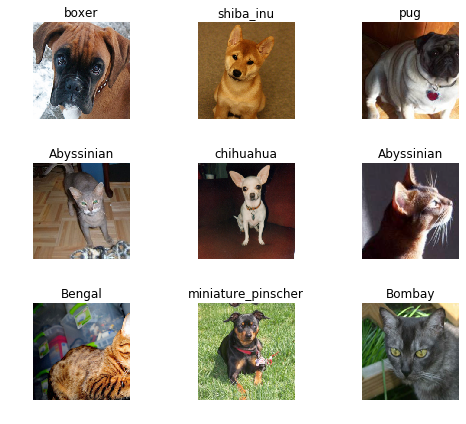

In [26]:
data.show_batch(rows=3,figsize=(7,6))

In [28]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [30]:
len(data.classes)
data.c

37

In [38]:
print(torch.cuda.is_available())


False


In [40]:
# model CNN
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/kamal/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:54<00:00, 1616397.97it/s]


In [41]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.373398,0.338492,0.106901,11:49
1,0.555757,0.264969,0.086604,14:07
2,0.334534,0.212495,0.073748,12:00
3,0.246358,0.208263,0.067659,10:53


In [42]:
learn.save('stage-1')

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3)]

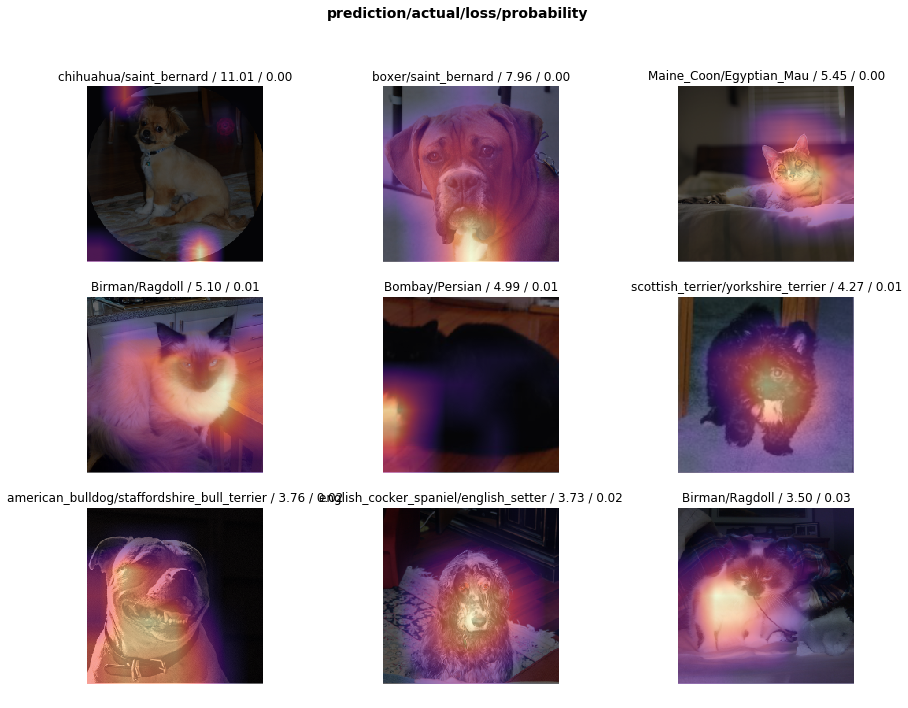

In [44]:
interp.plot_top_losses(9,figsize=(15,11))

In [45]:
doc(interp.plot_top_losses)

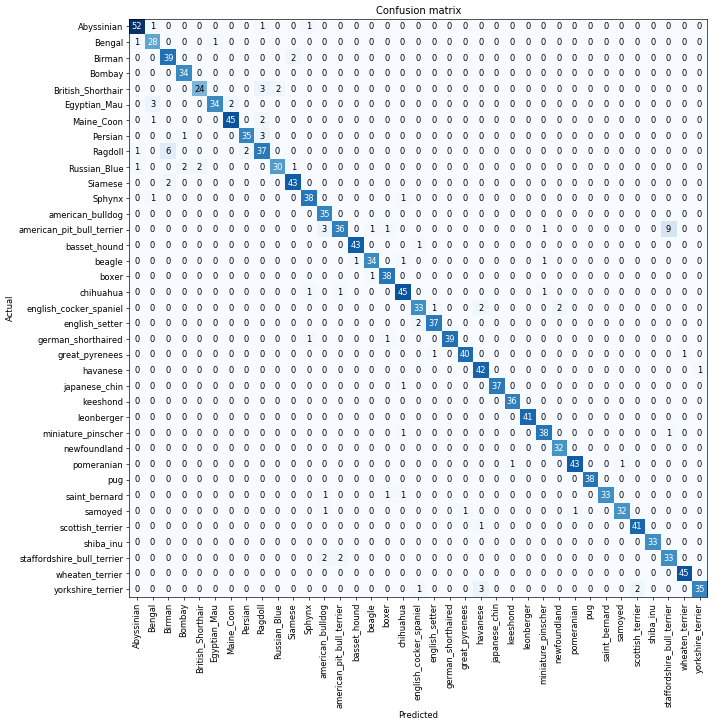

In [46]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [47]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Persian', 'Ragdoll', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Birman', 'Siamese', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Maine_Coon', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('english_cocker_spaniel', 'havanese', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.497957,0.340329,0.114344,12:35


In [50]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/kamal/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/kamal/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad